## **Evaluation**  
In this notebook we look at the results obtained by the grid search results for the C. Elegans data and have a look at the performance for down-sampled and up-sampled human DNA data.

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
from data.make_dataset import load_celegans, load_human_final_test, load_human

Load data sets

In [2]:
%%time
data = load_celegans()
data_h = load_human()
data_ht = load_human_final_test()

CPU times: user 29.7 s, sys: 1.2 s, total: 30.9 s
Wall time: 31.1 s


Calculate metrics for C. Elegans data

In [3]:
res = {'model name':list(),
       'AUROC':list(),
       'AUPRC':list(),
       'Accuracy':list()}
for exp in ['celegans-3-2','celegans-3-5','celegans-5-2','celegans-5-5','celegans-7-2','celegans-7-5']:
    scores = pickle.load(open(f'./results/{exp}/{exp}-preds.pkl','rb'))
    res['model name'].append(exp)
    res['AUROC'].append(metrics.roc_auc_score(data['test']['labels'],scores))
    prec, recall , _= metrics.precision_recall_curve(data['test']['labels'],scores)
    res['AUPRC'].append(metrics.auc(recall, prec))
    preds = (scores > 0.5).astype('int32')
    res['Accuracy'].append(metrics.accuracy_score(data['test']['labels'], preds))

res_df = pd.DataFrame(res)
res_df.head()

,model name,AUROC,AUPRC,Accuracy
0,celegans-3-2,0.99150,0.908466,0.972727
1,celegans-3-5,0.98600,0.912476,0.977273
2,celegans-5-2,0.98925,0.893622,0.963636
3,celegans-5-5,0.98525,0.843173,0.950000
4,celegans-7-2,0.98725,0.854127,0.968182


Calculate metrics for human data

In [4]:
res = {'model name':list(),
       'AUROC':list(),
       'AUPRC':list(),
       'Accuracy':list()}
for exp in ['human-down','human-up']:
    scores = pickle.load(open(f'./results/{exp}/{exp}-preds.pkl','rb'))
    res['model name'].append(exp)
    res['AUROC'].append(metrics.roc_auc_score(data_h['test']['labels'],scores))
    prec, recall , _= metrics.precision_recall_curve(data_h['test']['labels'],scores)
    res['AUPRC'].append(metrics.auc(recall, prec))
    preds = (scores > 0.5).astype('int32')
    res['Accuracy'].append(metrics.accuracy_score(data_h['test']['labels'], preds))

res_df = pd.DataFrame(res)
res_df.head()

,model name,AUROC,AUPRC,Accuracy
0,human-down,0.923368,0.051085,0.884649
1,human-up,0.932207,0.155845,0.995080


Confusion matrix:

In [5]:
scores = pickle.load(open(f'./results/human-up/human-up-test-preds.pkl','rb'))
preds = (scores > 0.5).astype('int32')
print(metrics.confusion_matrix(data_h['test']['labels'],preds,normalize='true'))

[[0.99642084 0.00357916]
 [1.         0.        ]]


Receiver Operating Characteristic & Precision Recall Curve plotting

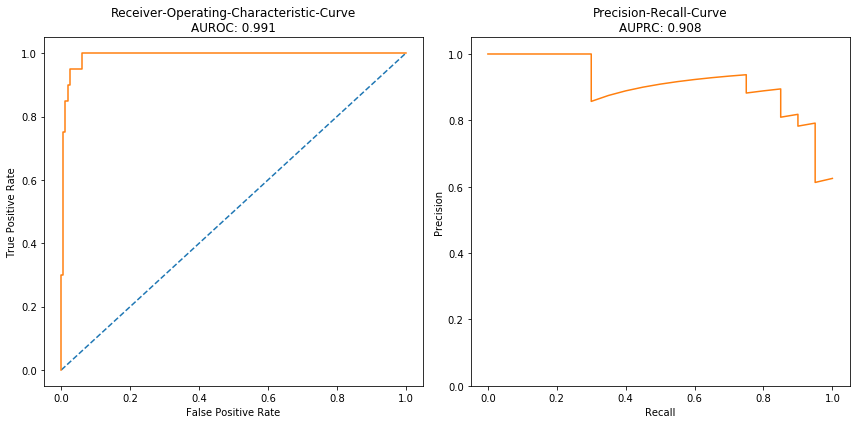

In [6]:
scores = pickle.load(open('./results/celegans-3-2/celegans-3-2-preds.pkl','rb'))
fpr, tpr, _ = metrics.roc_curve(data['test']['labels'],scores)
auroc = metrics.roc_auc_score(data['test']['labels'],scores)
prec, recall , _= metrics.precision_recall_curve(data['test']['labels'],scores)
auprc = metrics.auc(recall, prec)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.linspace(0,1),np.linspace(0,1),'--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver-Operating-Characteristic-Curve\nAUROC: {auroc :.3f}')
plt.subplot(1,2,2)
plt.plot(recall, prec,c='tab:orange')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.ylim(0,1.05)
plt.title(f'Precision-Recall-Curve\nAUPRC: {auprc :.3f}')
plt.tight_layout()
#plt.savefig('./visualization/AUC-celegans.png',dpi=100)
plt.show()

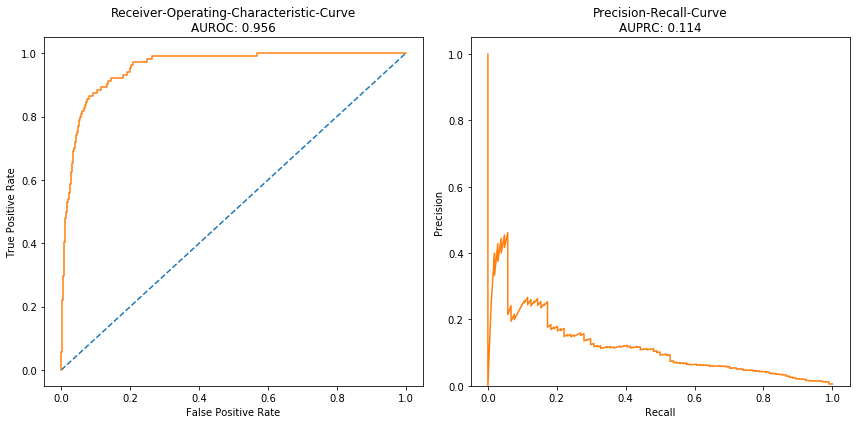

In [7]:
scores = pickle.load(open('./results/human-up/human-up-test-preds.pkl','rb'))
fpr, tpr, _ = metrics.roc_curve(data_ht['test']['labels'],scores)
auroc = metrics.roc_auc_score(data_ht['test']['labels'],scores)
prec, recall , _= metrics.precision_recall_curve(data_ht['test']['labels'],scores)
auprc = metrics.auc(recall, prec)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(np.linspace(0,1),np.linspace(0,1),'--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver-Operating-Characteristic-Curve\nAUROC: {auroc :.3f}')
plt.subplot(1,2,2)
plt.plot(recall, prec,c='tab:orange')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.ylim(0,1.05)
plt.title(f'Precision-Recall-Curve\nAUPRC: {auprc :.3f}')
plt.tight_layout()
#plt.savefig('./visualization/AUC-human.png',dpi=100)
plt.show()